# Genrify Project
## Music genre prediction

Henri Toussaint<br>
Victor Saint Guilhem<br>
Benoît Lafon<br>

The project sets out to predict the genre of a music using the Spotify API.

# Data Loading Using Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("music_collection.csv")
pd_attributes = data.loc[:,'acousticness':'valence']
attributes = np.array(pd_attributes)

print('Number of instances: ' + str(data.shape[0]))
print('Number of attributes: ' + str(pd_attributes.shape[1]))
print('Attributes:')
for i in pd_attributes.columns.values:
    print('\t'+str(i))

Number of instances: 100
Number of attributes: 12
Attributes:
	acousticness
	danceability
	duration_ms
	energy
	instrumentalness
	key
	liveness
	loudness
	speechiness
	tempo
	time_signature
	valence


In [2]:
data.head()

,artist,track,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,genre
0,Bill Evans,Skating In Central Park - Digitally Remastered,0.993,0.478,324200,0.0294,0.948000,0,0.1050,-25.319,0.0453,124.307,3,0.161,jazz
1,Jimmy Smith,Midnight Special - 2007 Digital Remaster,0.814,0.704,597280,0.2770,0.756000,0,0.0845,-11.675,0.0350,90.380,4,0.321,jazz
2,Snarky Puppy,Atchafalaya,0.152,0.427,364387,0.6720,0.912000,10,0.6890,-10.518,0.3210,205.074,4,0.631,jazz
3,Sun Ra,Nuclear War,0.757,0.604,463913,0.3950,0.000000,10,0.2340,-13.536,0.1460,85.856,4,0.357,jazz
4,Miles Davis,Stella By Starlight,0.912,0.485,284560,0.1440,0.000114,10,0.0965,-12.824,0.0362,86.143,4,0.230,jazz


# Target variable

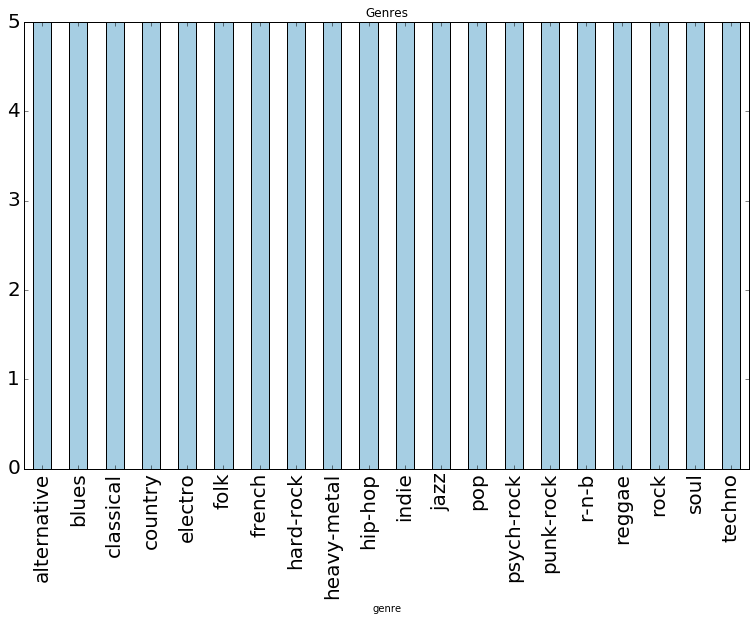

In [3]:
#plt.figure('Genres')
%matplotlib inline
#data['genre'].astype("category")
count_genre = data.groupby("genre").size()
count_genre.plot(kind='bar',title='Genres',figsize=[13,8], colormap='Paired',fontsize=20)


# Target Variable vectorized

In [4]:
pd_target_vect = pd.get_dummies(data['genre'])
pd_target_vect.head()

,alternative,blues,classical,country,electro,folk,french,hard-rock,heavy-metal,hip-hop,indie,jazz,pop,psych-rock,punk-rock,r-n-b,reggae,rock,soul,techno
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
target_vect = np.array(pd_target_vect)
target_vect

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

# Acousticness attribute

<IPython.core.display.Javascript object>


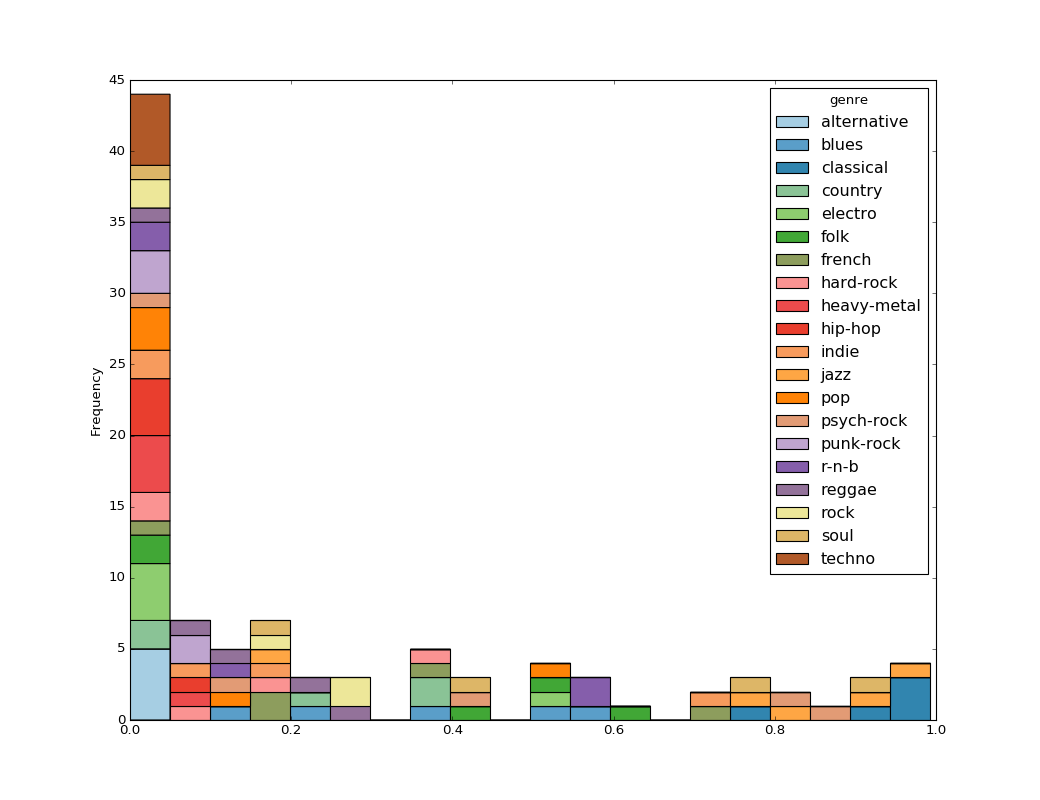

In [6]:
%matplotlib notebook
acousticness = data[['acousticness']]
acousticness_genre = data.loc[:,['acousticness','genre']]

acousticness_by_genre = acousticness_genre.pivot(columns='genre', values='acousticness')
acousticness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [7]:
acousticness.describe()

,acousticness
count,100.000000
mean,0.247523
std,0.307043
min,0.000004
25%,0.009675
50%,0.095650
75%,0.419750
max,0.993000


# Danceability attribute

<IPython.core.display.Javascript object>


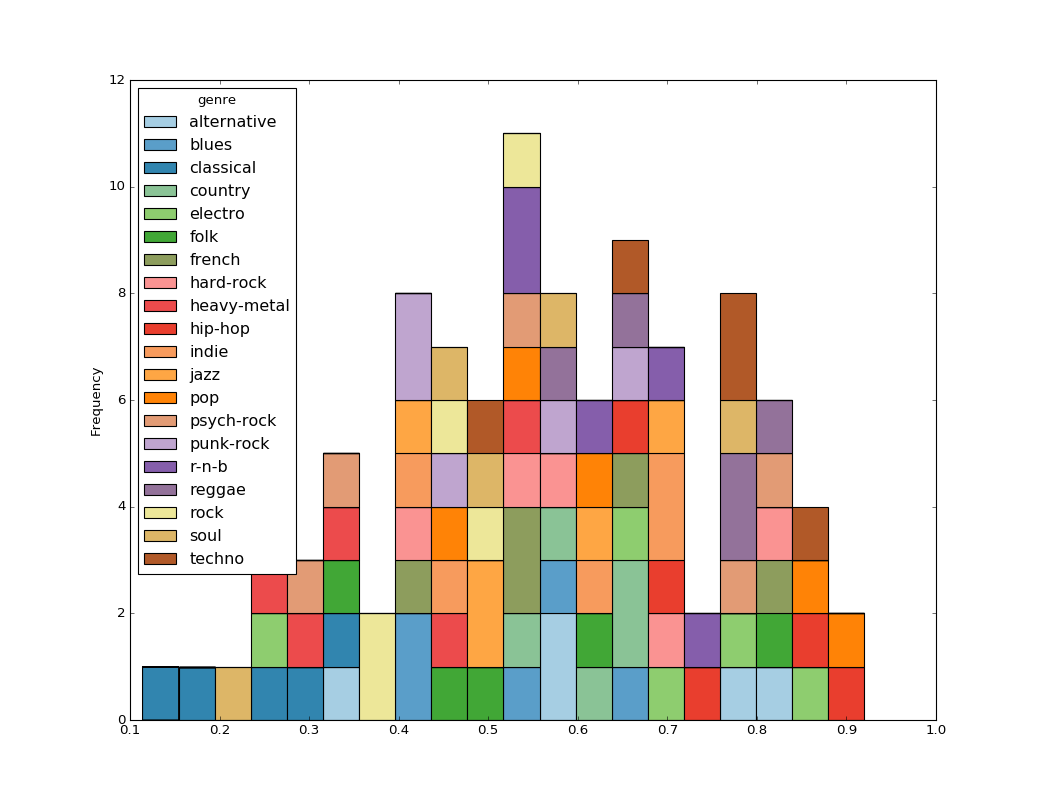

In [8]:
danceability = data[['danceability']]
danceability_genre = data.loc[:,['danceability','genre']]

danceability_by_genre = danceability_genre.pivot(columns='genre', values='danceability')
danceability_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [9]:
danceability.describe()

,danceability
count,100.000000
mean,0.569680
std,0.179426
min,0.114000
25%,0.455500
50%,0.573500
75%,0.691750
max,0.920000


# Duration attribute

<IPython.core.display.Javascript object>


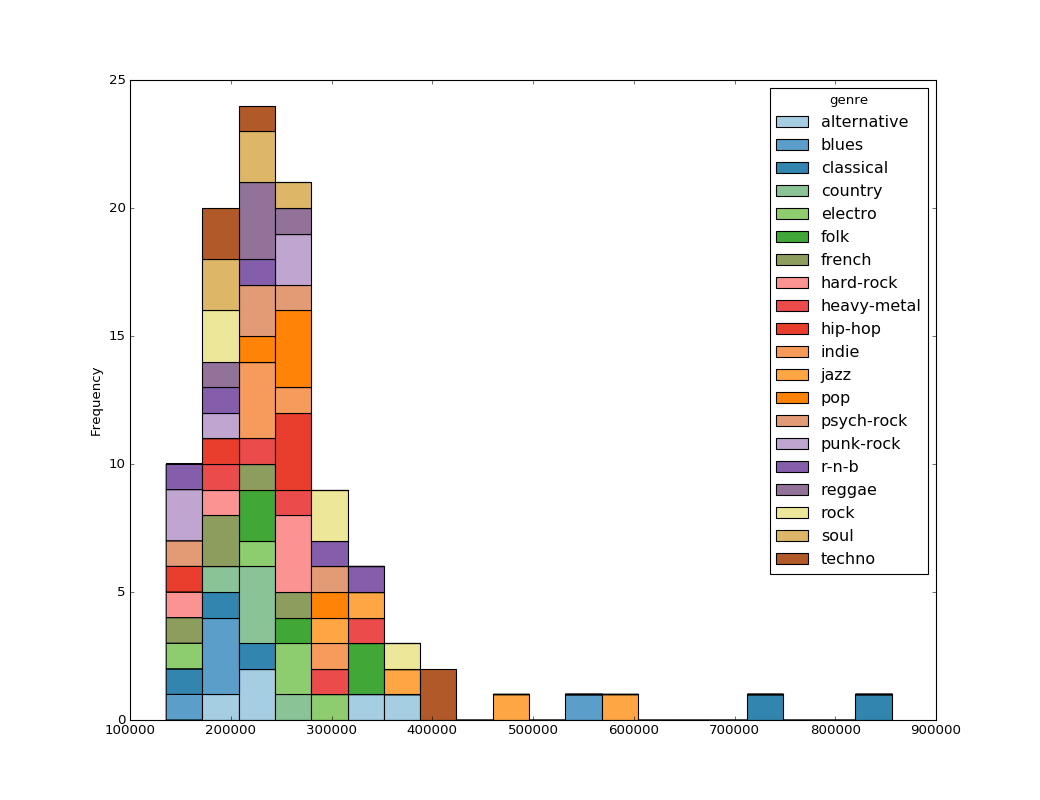

In [10]:
duration_ms = data[['duration_ms']]
duration_ms_genre = data.loc[:,['duration_ms','genre']]

duration_ms_by_genre = duration_ms_genre.pivot(columns='genre', values='duration_ms')
duration_ms_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [11]:
duration_ms.describe()

,duration_ms
count,100.000000
mean,258757.790000
std,109157.737774
min,135907.000000
25%,197689.750000
50%,235113.500000
75%,278713.500000
max,856053.000000


# Energy attribute

<IPython.core.display.Javascript object>


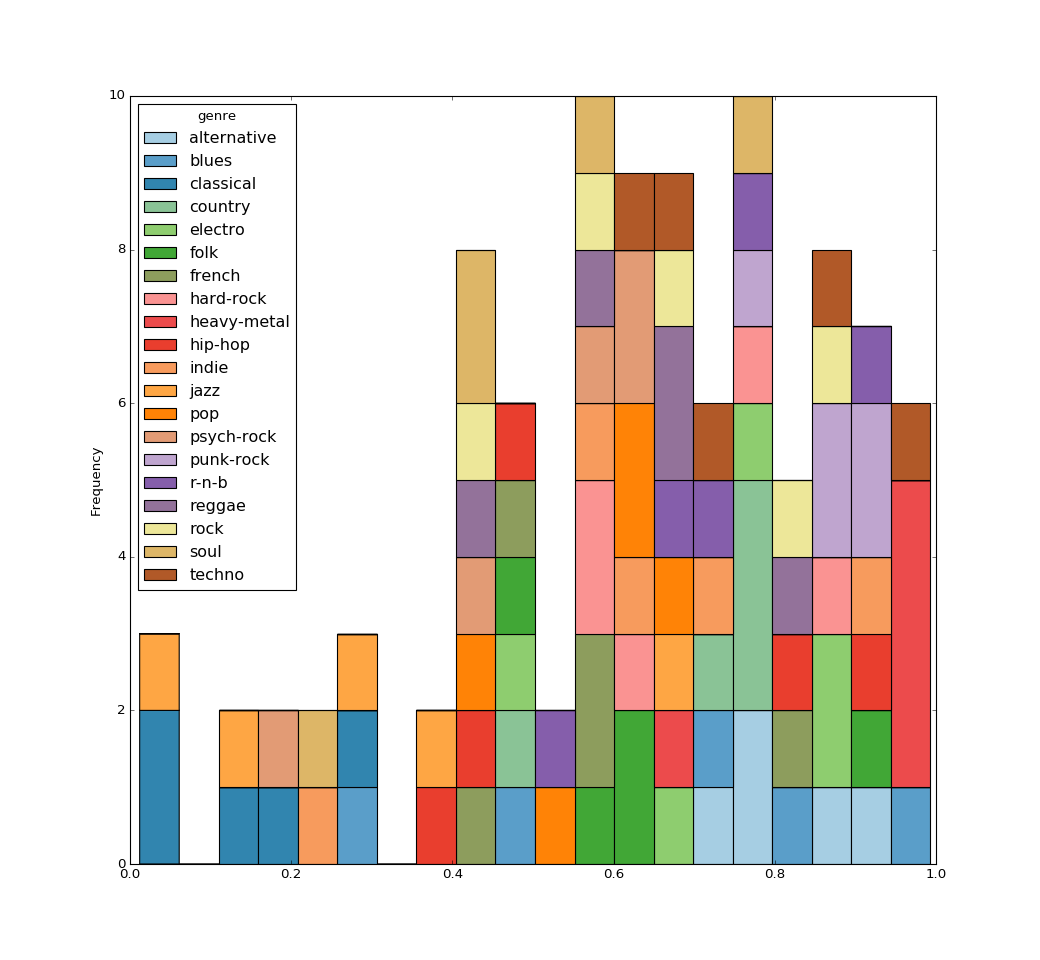

In [12]:
energy = data[['energy']]
energy_genre = data.loc[:,['energy','genre']]

energy_by_genre = energy_genre.pivot(columns='genre', values='energy')
energy_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,12],bins=20)

In [13]:
energy.describe()

,energy
count,100.000000
mean,0.629918
std,0.237551
min,0.012000
25%,0.486500
50%,0.651500
75%,0.806000
max,0.993000


# Instrumentalness attribute

<IPython.core.display.Javascript object>


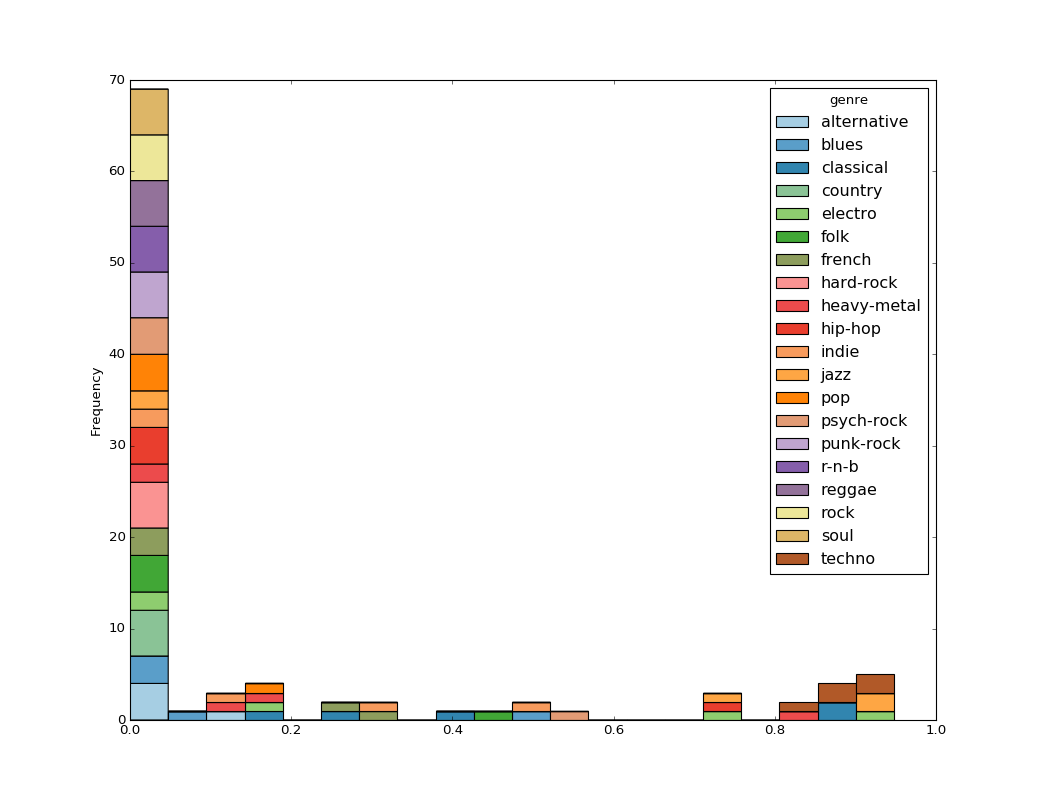

In [14]:
instrumentalness = data[['instrumentalness']]
instrumentalness_genre = data.loc[:,['instrumentalness','genre']]

instrumentalness_by_genre = instrumentalness_genre.pivot(columns='genre', values='instrumentalness')
instrumentalness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [15]:
instrumentalness.describe()

,instrumentalness
count,100.000000
mean,0.168827
std,0.305634
min,0.000000
25%,0.000000
50%,0.000489
75%,0.169500
max,0.948000


# Key attribute

<IPython.core.display.Javascript object>


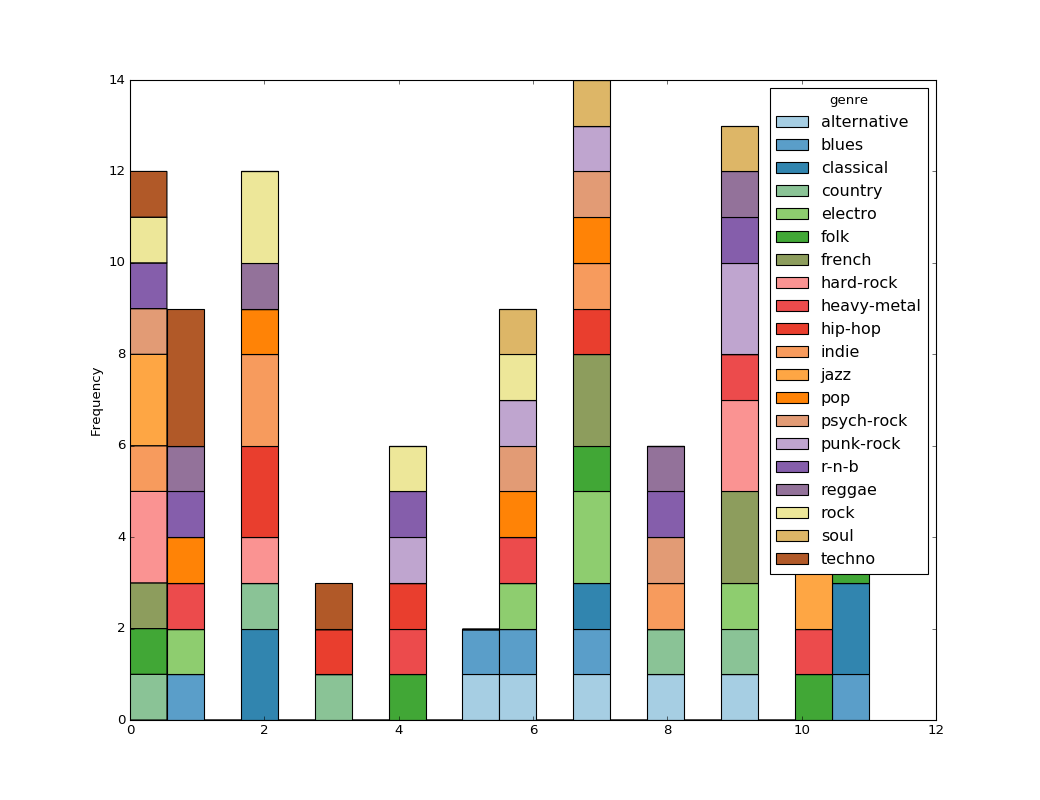

In [16]:
key = data[['key']]
key_genre = data.loc[:,['key','genre']]

key_by_genre = key_genre.pivot(columns='genre', values='key')
key_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [17]:
key.describe()

,key
count,100.000000
mean,5.400000
std,3.634848
min,0.000000
25%,2.000000
50%,6.000000
75%,9.000000
max,11.000000


# Liveness attribute

<IPython.core.display.Javascript object>


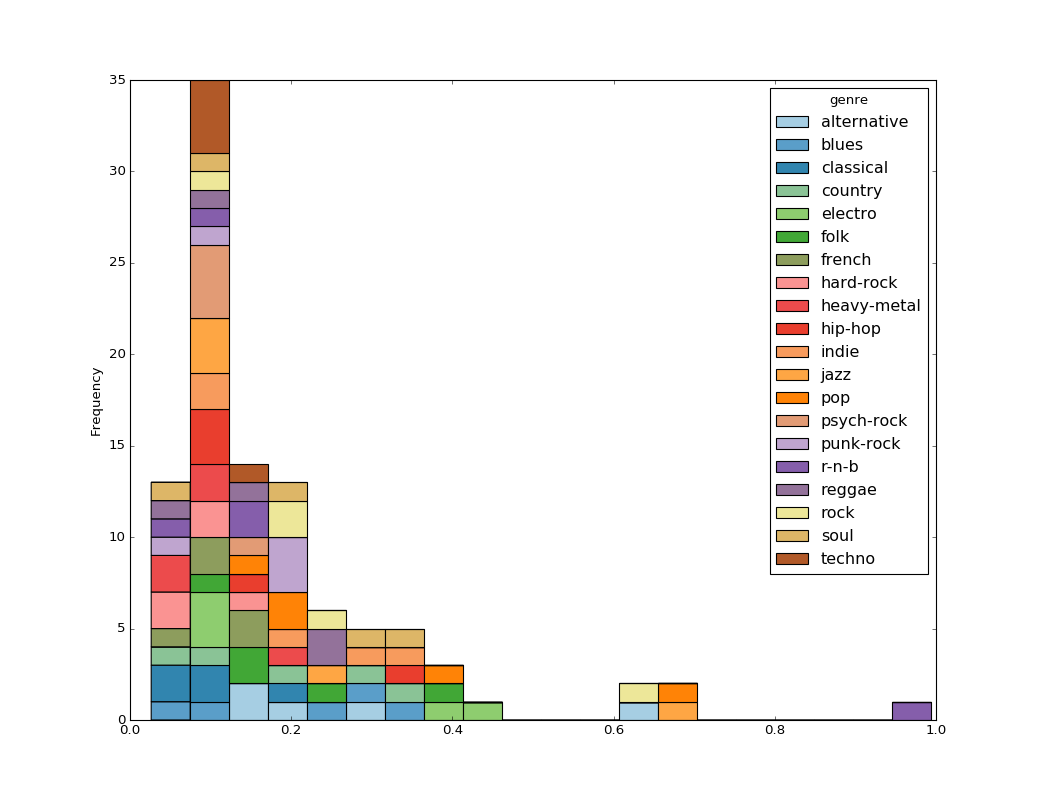

In [18]:
liveness = data[['liveness']]
liveness_genre = data.loc[:,['liveness','genre']]

liveness_by_genre = liveness_genre.pivot(columns='genre', values='liveness')
liveness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [19]:
liveness.describe()

,liveness
count,100.000000
mean,0.182969
std,0.156118
min,0.026300
25%,0.088350
50%,0.126500
75%,0.216500
max,0.994000


# Loudness attribute

<IPython.core.display.Javascript object>


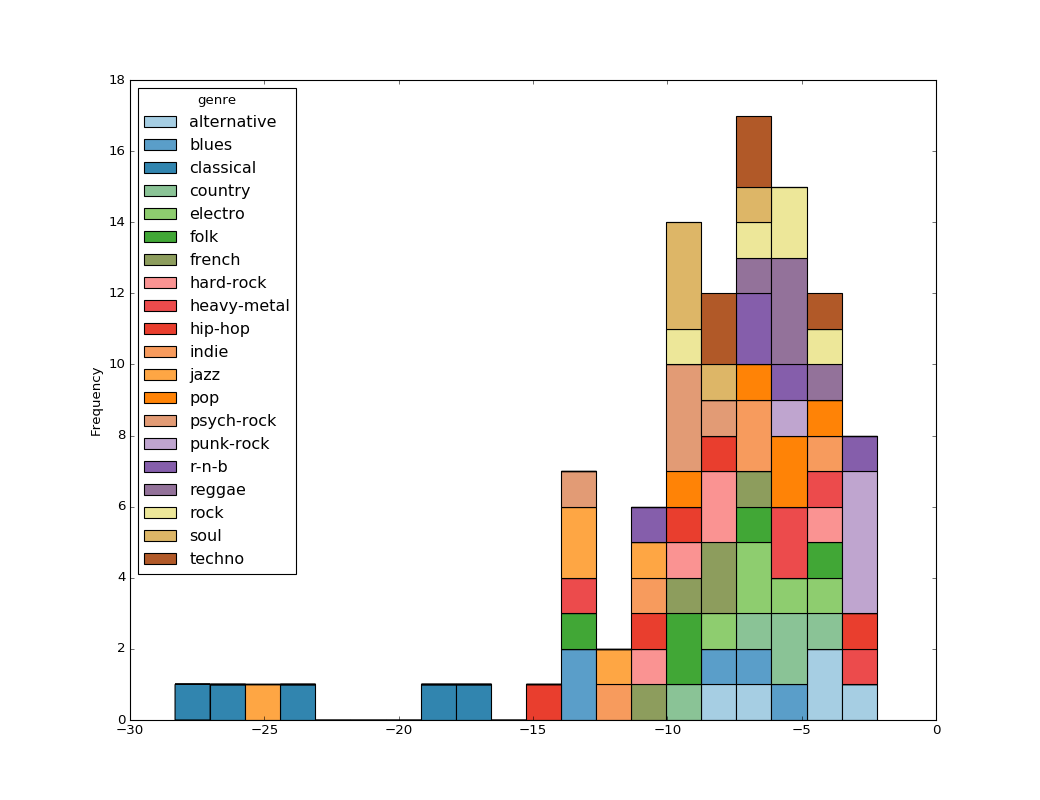

In [20]:
loudness = data[['loudness']]
loudness_genre = data.loc[:,['loudness','genre']]

loudness_by_genre = loudness_genre.pivot(columns='genre', values='loudness')
loudness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [21]:
loudness.describe()

,loudness
count,100.000000
mean,-8.322630
std,4.851138
min,-28.323000
25%,-9.832000
50%,-7.263000
75%,-5.210000
max,-2.206000


# Speechiness attribute

<IPython.core.display.Javascript object>


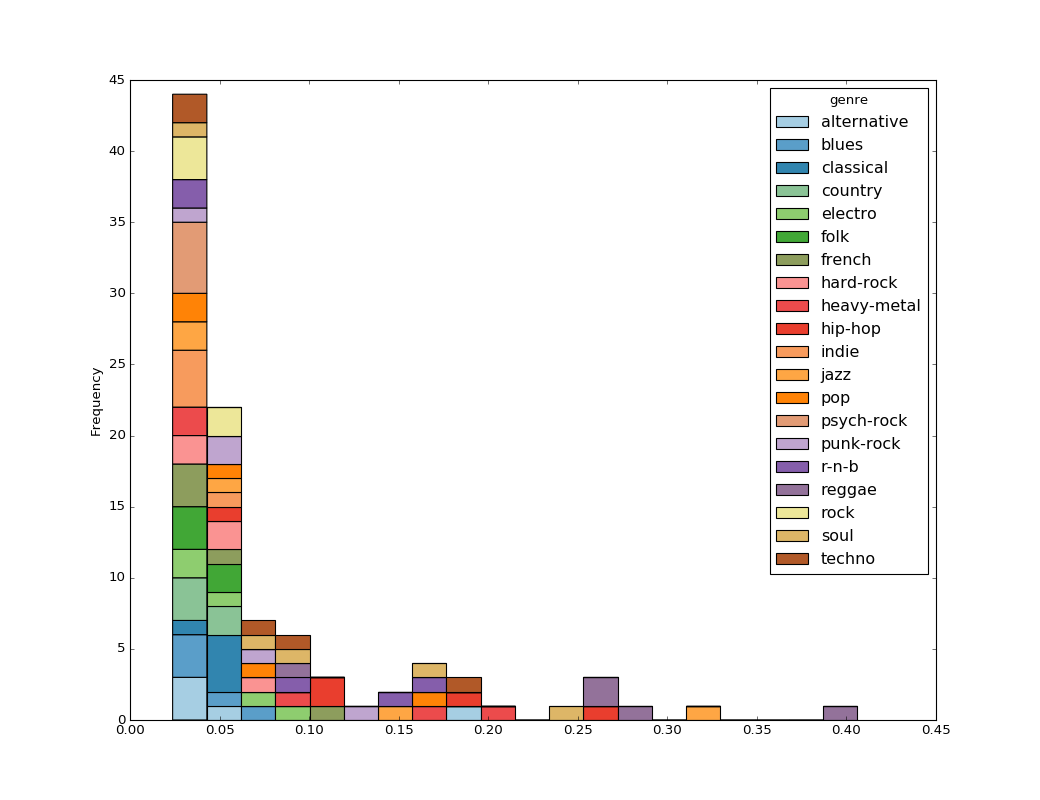

In [22]:
speechiness = data[['speechiness']]
speechiness_genre = data.loc[:,['speechiness','genre']]

speechiness_by_genre = speechiness_genre.pivot(columns='genre', values='speechiness')
speechiness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [23]:
speechiness.describe()

,speechiness
count,100.000000
mean,0.078952
std,0.074583
min,0.023800
25%,0.035300
50%,0.046850
75%,0.086850
max,0.406000


# Tempo attribute

<IPython.core.display.Javascript object>


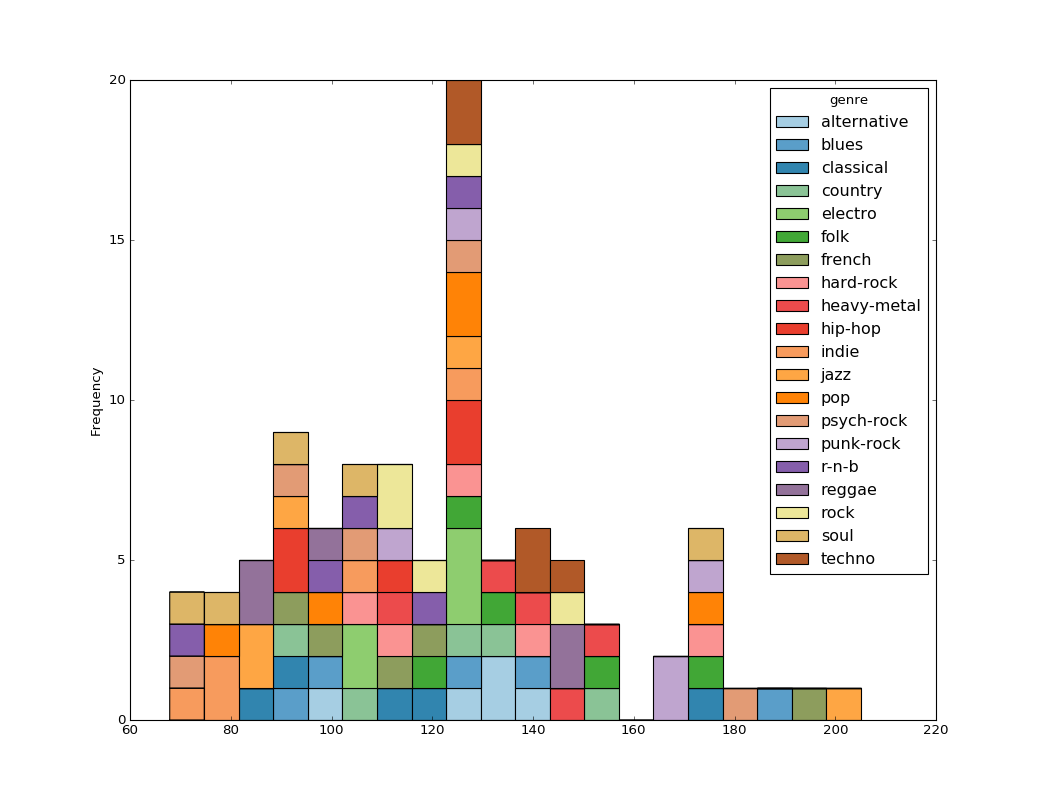

In [24]:
tempo = data[['tempo']]
tempo_genre = data.loc[:,['tempo','genre']]

tempo_by_genre = tempo_genre.pivot(columns='genre', values='tempo')
tempo_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [25]:
tempo.describe()

,tempo
count,100.000000
mean,121.519750
std,29.718144
min,67.884000
25%,97.479000
50%,123.506000
75%,137.615750
max,205.074000


# Time Signature attribute

<IPython.core.display.Javascript object>


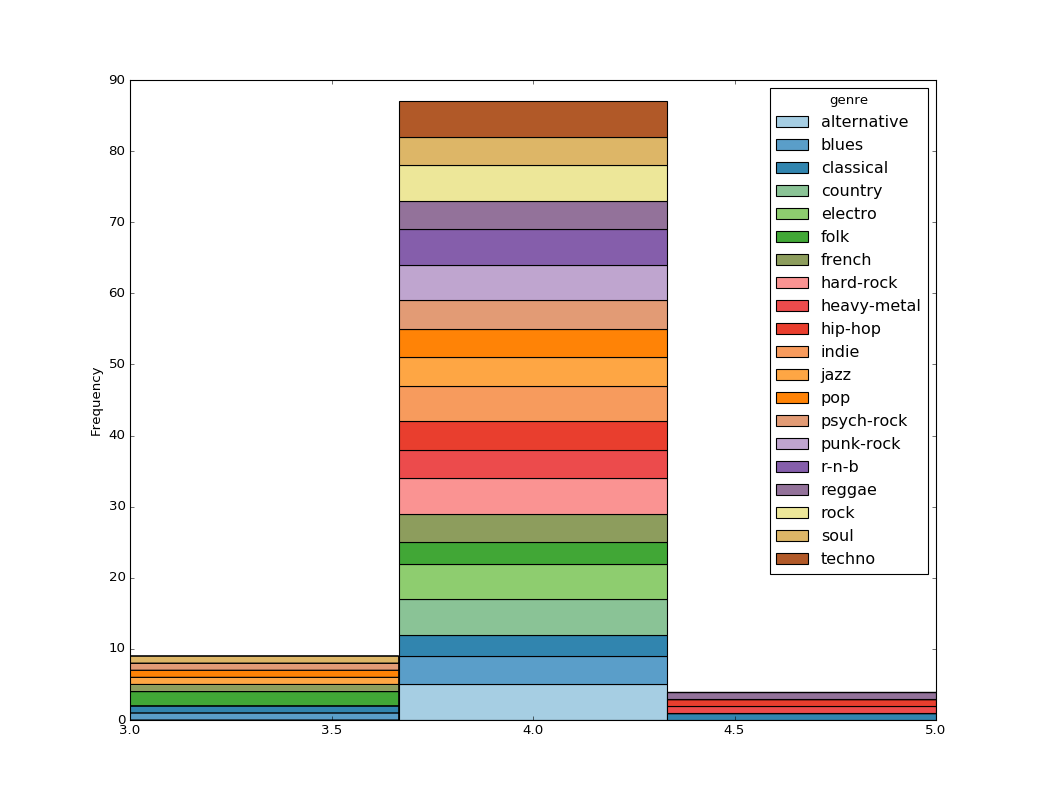

In [26]:
time_signature = data[['time_signature']]
#time_signature.plot(kind='bar',figsize=[13,8])
time_signature_genre = data.loc[:,['time_signature','genre']]

time_signature_by_genre = time_signature_genre.pivot(columns='genre', values='time_signature')
time_signature_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=3)


In [27]:
time_signature.describe()

,time_signature
count,100.00000
mean,3.95000
std,0.35887
min,3.00000
25%,4.00000
50%,4.00000
75%,4.00000
max,5.00000


# Valence attribute

<IPython.core.display.Javascript object>


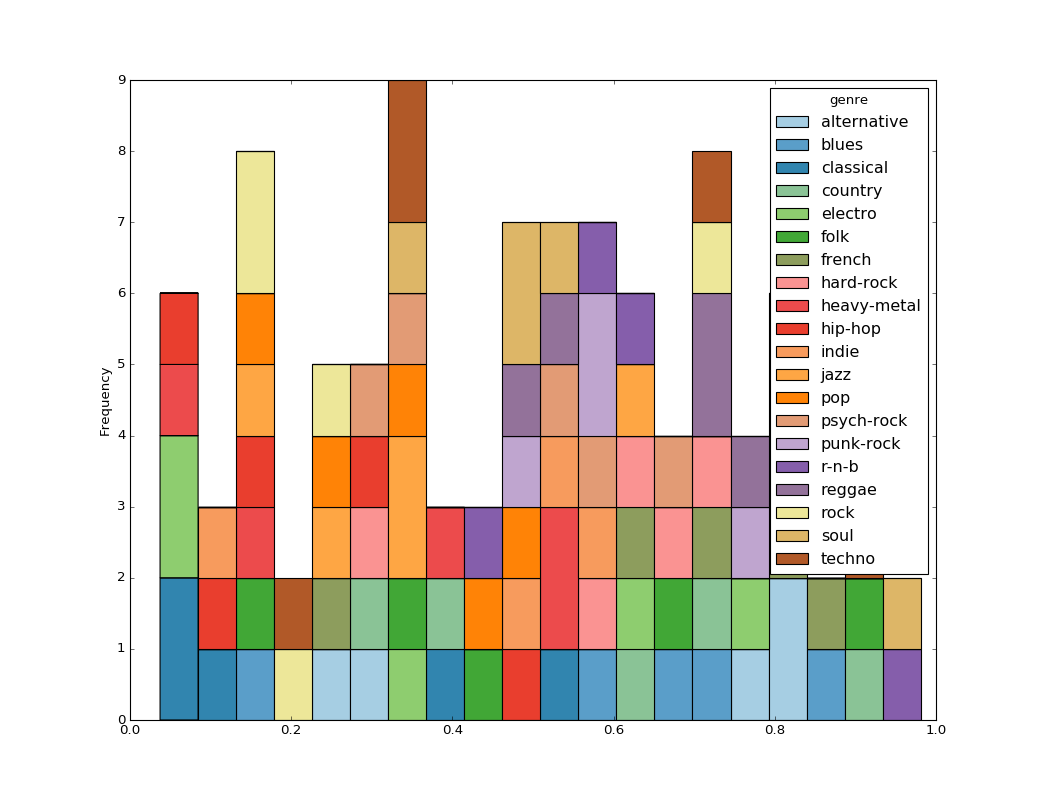

In [28]:
valence = data[['valence']]
valence_genre = data.loc[:,['valence','genre']]

valence_by_genre = valence_genre.pivot(columns='genre', values='valence')
valence_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [29]:
valence.describe()

,valence
count,100.000000
mean,0.484650
std,0.250949
min,0.037300
25%,0.286750
50%,0.505500
75%,0.680500
max,0.981000
